<a href="https://colab.research.google.com/github/Avasa29/EDA-1-GT/blob/main/Global_Terrorism_Analysis_EDA_Capstone_Solution_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>






*   Improt Libraries and Data set

---





In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#file Loading
file_path = '/content/drive/MyDrive/My project EDA/Global Terrorism Data.csv'
GT_df = pd.read_csv(file_path , encoding='latin-1')
GT_df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN




*   Data Undersatnding


---





In [8]:
#check file Details 
GT_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
GT_df.shape

(181691, 135)

In [10]:
GT_df.dtypes


eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [11]:
GT_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Missing Value % in GT data
missing_values =(((GT_df.isnull().sum()).sum())/GT_df.size)*100
missing_values

56.481718962414206

*  it is clear that there are more than 55% vlaues are null. So need to clean the GT data.


---




In [13]:
#GT dataframe with usefull data.
GT_df.rename(columns={'iyear':'YEAR','imonth':'MONTH','iday':'DAY','country_txt':'Country','region_txt':'REGION','provstate':'STATE','attacktype1_txt':'Attacktype','target1':'TARGET','nkill':'KILLED','nwound':'Wound','gname':'Group','targettype1_txt':'Target','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)

In [14]:
GT_df = GT_df[{'YEAR','MONTH','DAY','Country','REGION','STATE','Attacktype','TARGET','KILLED','Wound','Group','Weapon_Type','TARGET','Motive'}]
GT_df.head(20)

,Group,MONTH,YEAR,Motive,Weapon_Type,Country,STATE,KILLED,REGION,DAY,TARGET,Attacktype,Wound
0,MANO-D,7,1970,NaN,Unknown,Dominican Republic,NaN,1.0,Central America & Caribbean,2,Julio Guzman,Assassination,0.0
1,23rd of September Communist League,0,1970,NaN,Unknown,Mexico,Federal,0.0,North America,0,"Nadine Chaval, daughter",Hostage Taking (Kidnapping),0.0
2,Unknown,1,1970,NaN,Unknown,Philippines,Tarlac,1.0,Southeast Asia,0,Employee,Assassination,0.0
3,Unknown,1,1970,NaN,Explosives,Greece,Attica,NaN,Western Europe,0,U.S. Embassy,Bombing/Explosion,NaN
4,Unknown,1,1970,NaN,Incendiary,Japan,Fukouka,NaN,East Asia,0,U.S. Consulate,Facility/Infrastructure Attack,NaN
5,Black Nationalists,1,1970,To protest the Cairo Illinois Police Deparment,Firearms,United States,Illinois,0.0,North America,1,Cairo Police Headquarters,Armed Assault,0.0
6,Tupamaros (Uruguay),1,1970,NaN,Firearms,Uruguay,Montevideo,0.0,South America,2,Juan Maria de Lucah/Chief of Directorate of in...,Assassination,0.0
7,Unknown,1,1970,NaN,Explosives,United States,California,0.0,North America,2,Edes Substation,Bombing/Explosion,0.0
8,New Year's Gang,1,1970,To protest the War in Vietnam and the draft,Incendiary,United States,Wisconsin,0.0,North America,2,"R.O.T.C. offices at University of Wisconsin, M...",Facility/Infrastructure Attack,0.0
9,New Year's Gang,1,1970,To protest the War in Vietnam and the draft,Incendiary,United States,Wisconsin,0.0,North America,3,Selective Service Headquarters in Madison Wisc...,Facility/Infrastructure Attack,0.0


In [15]:
for i in GT_df.columns:
  print(i,GT_df[i].nunique())

Group 3537
MONTH 13
YEAR 47
Motive 14490
Weapon_Type 12
Country 205
STATE 2855
KILLED 205
REGION 12
DAY 32
TARGET 86006
Attacktype 9
Wound 238


In [16]:
GT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Group        181691 non-null  object 
 1   MONTH        181691 non-null  int64  
 2   YEAR         181691 non-null  int64  
 3   Motive       50561 non-null   object 
 4   Weapon_Type  181691 non-null  object 
 5   Country      181691 non-null  object 
 6   STATE        181270 non-null  object 
 7   KILLED       171378 non-null  float64
 8   REGION       181691 non-null  object 
 9   DAY          181691 non-null  int64  
 10  TARGET       181055 non-null  object 
 11  Attacktype   181691 non-null  object 
 12  Wound        165380 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 18.0+ MB


Here Killed & Wound have lots of Null Values.Need to fill them.

In [17]:
GT_df['Wound'] = GT_df['Wound'].fillna(0).astype(int)
GT_df['KILLED'] = GT_df['KILLED'].fillna(0).astype(int)


In [18]:
GT_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Group        181691 non-null  object
 1   MONTH        181691 non-null  int64 
 2   YEAR         181691 non-null  int64 
 3   Motive       50561 non-null   object
 4   Weapon_Type  181691 non-null  object
 5   Country      181691 non-null  object
 6   STATE        181270 non-null  object
 7   KILLED       181691 non-null  int64 
 8   REGION       181691 non-null  object
 9   DAY          181691 non-null  int64 
 10  TARGET       181055 non-null  object
 11  Attacktype   181691 non-null  object
 12  Wound        181691 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.0+ MB




*   Now this is our usefull Data. At this data we will do Analysis.   

---






In [19]:
GT_df.head(20)

,Group,MONTH,YEAR,Motive,Weapon_Type,Country,STATE,KILLED,REGION,DAY,TARGET,Attacktype,Wound
0,MANO-D,7,1970,NaN,Unknown,Dominican Republic,NaN,1,Central America & Caribbean,2,Julio Guzman,Assassination,0
1,23rd of September Communist League,0,1970,NaN,Unknown,Mexico,Federal,0,North America,0,"Nadine Chaval, daughter",Hostage Taking (Kidnapping),0
2,Unknown,1,1970,NaN,Unknown,Philippines,Tarlac,1,Southeast Asia,0,Employee,Assassination,0
3,Unknown,1,1970,NaN,Explosives,Greece,Attica,0,Western Europe,0,U.S. Embassy,Bombing/Explosion,0
4,Unknown,1,1970,NaN,Incendiary,Japan,Fukouka,0,East Asia,0,U.S. Consulate,Facility/Infrastructure Attack,0
5,Black Nationalists,1,1970,To protest the Cairo Illinois Police Deparment,Firearms,United States,Illinois,0,North America,1,Cairo Police Headquarters,Armed Assault,0
6,Tupamaros (Uruguay),1,1970,NaN,Firearms,Uruguay,Montevideo,0,South America,2,Juan Maria de Lucah/Chief of Directorate of in...,Assassination,0
7,Unknown,1,1970,NaN,Explosives,United States,California,0,North America,2,Edes Substation,Bombing/Explosion,0
8,New Year's Gang,1,1970,To protest the War in Vietnam and the draft,Incendiary,United States,Wisconsin,0,North America,2,"R.O.T.C. offices at University of Wisconsin, M...",Facility/Infrastructure Attack,0
9,New Year's Gang,1,1970,To protest the War in Vietnam and the draft,Incendiary,United States,Wisconsin,0,North America,3,Selective Service Headquarters in Madison Wisc...,Facility/Infrastructure Attack,0




*   ANALYSIS




---



1-  Type of Attacks

---










In [20]:
GT_df['Attacktype'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

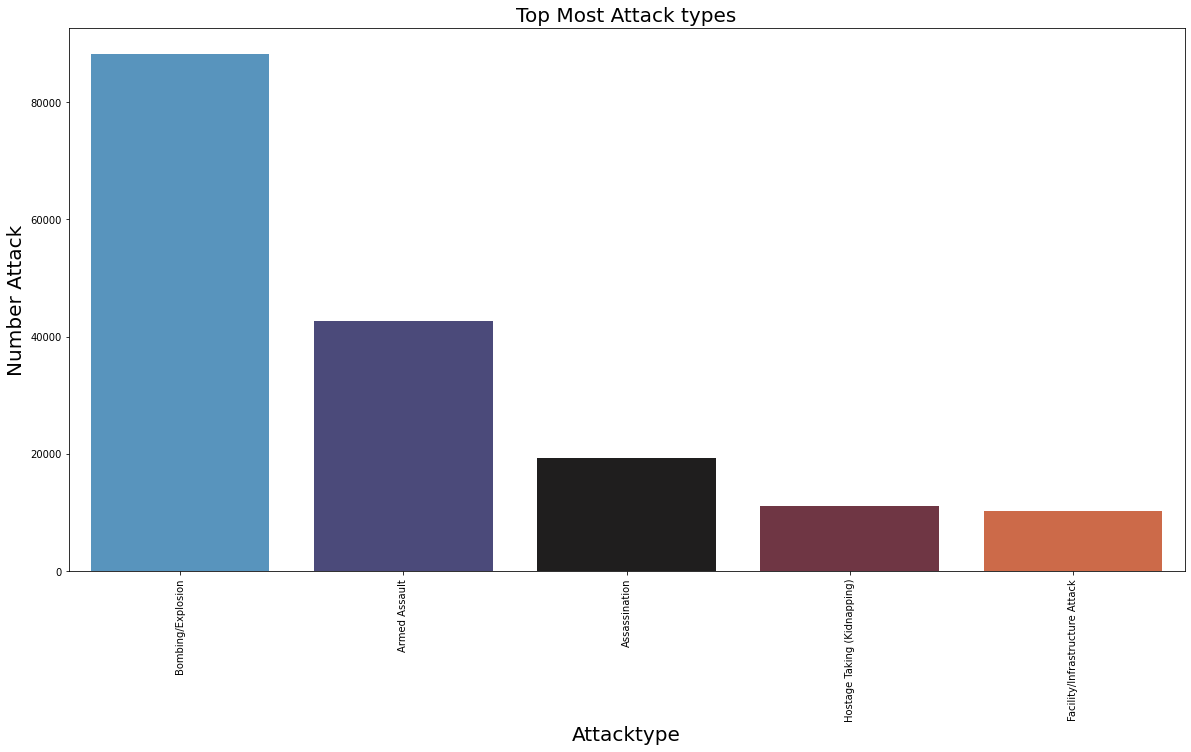

In [21]:
#Top Attack Type
plt.figure(figsize=(20,10))
sns.barplot(GT_df['Attacktype'].value_counts().head().index, GT_df['Attacktype'].value_counts().head().values,palette='icefire')
plt.title('Top Most Attack types',fontsize=20)
plt.xlabel('Attacktype',fontsize=20)
plt.ylabel('Number Attack',fontsize=20)
plt.xticks(rotation=90)
plt.show()



*   More than 8000 attack by Bombing/Explosion.
*   More than 4000 attack by Armed Assault.




2- Most Weapon Use in Attacks


---



In [22]:
GT_df['Weapon_Type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Text(0, 0.5, 'Number of Attack')

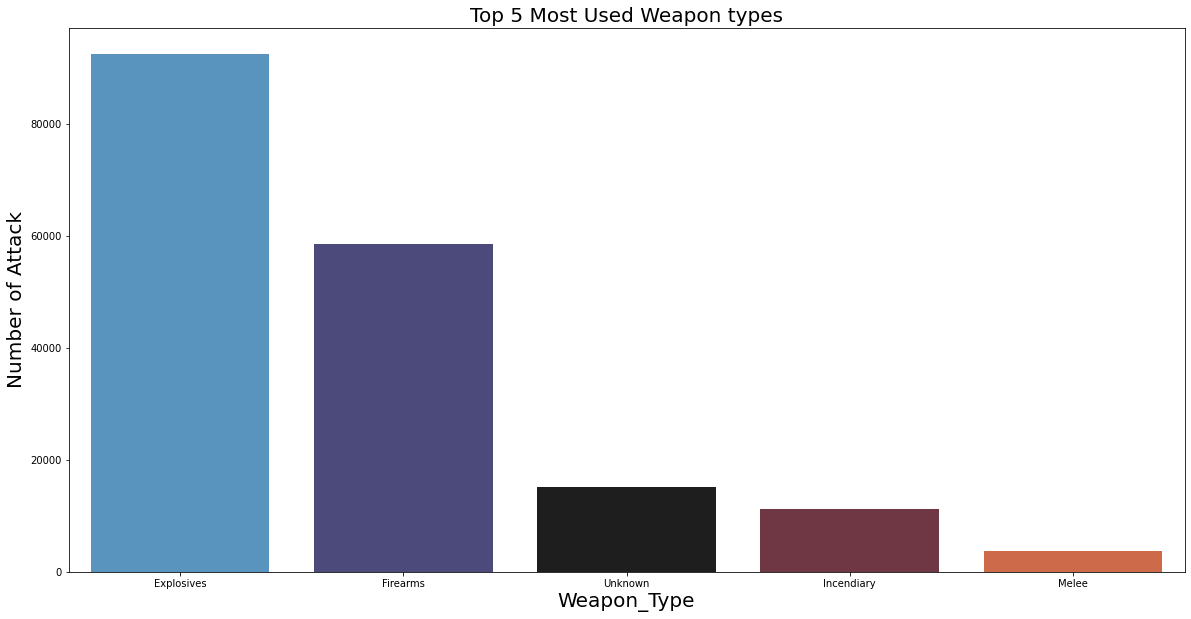

In [23]:
#Top 5 weapon used
plt.figure(figsize=(20,10))
sns.barplot(GT_df['Weapon_Type'].value_counts().head().index, GT_df['Weapon_Type'].value_counts().head().values,palette='icefire')
plt.title('Top 5 Most Used Weapon types',fontsize=20)
plt.xlabel('Weapon_Type',fontsize=20)
plt.ylabel('Number of Attack',fontsize=20)




*   More Than 8000 times Explosive used.
*   Near About 6000 times Firearms used.

3-TOP MOST ATTACK TARGET


---





In [24]:
GT_df['TARGET'].value_counts()

Civilians                  6461
Unknown                    5918
Soldiers                   3157
Patrol                     2942
Checkpoint                 2905
                           ... 
Manager Sanat Raj             1
Military/ Police patrol       1
Thor 67 Outpost               1
Employee's Vehicle            1
Hmeymim Air Base              1
Name: TARGET, Length: 86006, dtype: int64

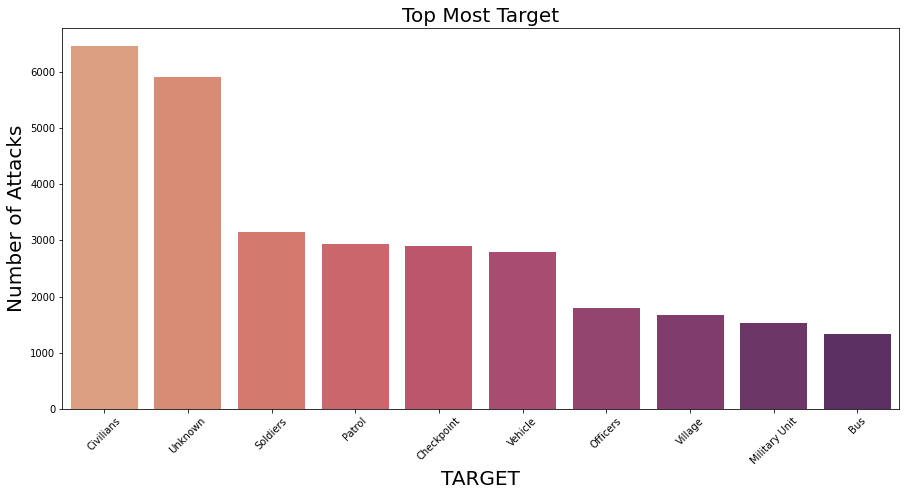

In [25]:
#Top most Attack Targets
plt.figure(figsize=(15,7))
sns.barplot(GT_df['TARGET'].value_counts().head(10).index, GT_df['TARGET'].value_counts().head(10).values,palette='flare')
plt.title('Top Most Target',fontsize=20)
plt.xlabel('TARGET',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=45)
plt.show()



*   More than 6000 Attacks on Civilians.
*   Approx. 3000 Attacks on Soldiers and Patrol.

4-Top Most Affected Countries

---



In [26]:
GT_df.Country.value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

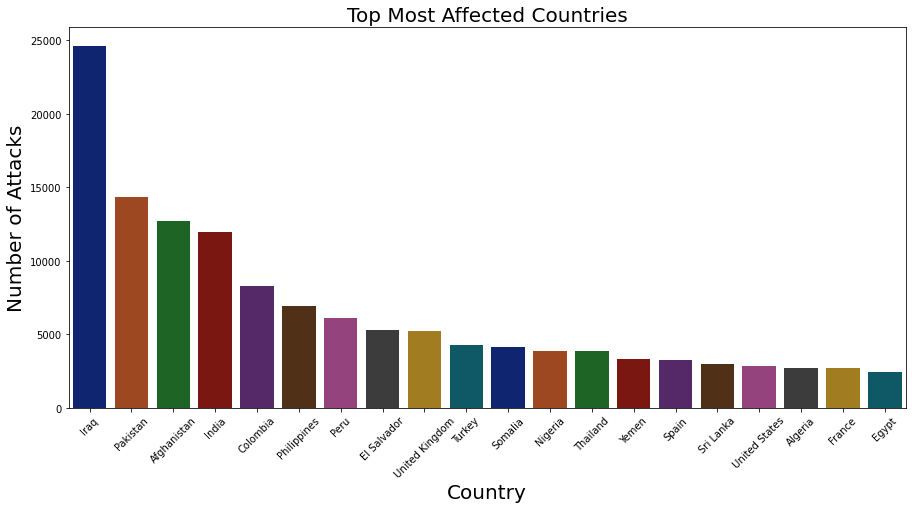

In [29]:
#Top most Country Affected
plt.figure(figsize=(15,7))
sns.barplot(GT_df['Country'].value_counts().head(20).index, GT_df['Country'].value_counts().head(20).values,palette='dark')
plt.title('Top Most Affected Countries',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=45)
plt.show()



*   Top Most Affected country is Iraq.Where Approx. 25000 times attack by Terrorist. Pakistan is at IInd and IIIrd Afganistan.





5-No. of Death year on year

---



In [ ]:
GT_df.groupby(['YEAR'])['KILLED'].sum()

YEAR
1970      174
1971      173
1972      566
1973      370
1974      539
1975      617
1976      674
1977      456
1978     1459
1979     2100
1980     4400
1981     4851
1982     5136
1983     9444
1984    10450
1985     7094
1986     4976
1987     6482
1988     7208
1989     8152
1990     7148
1991     8429
1992     9742
1994     7690
1995     6103
1996     6966
1997    10924
1998     4688
1999     3393
2000     4403
2001     7729
2002     4805
2003     3317
2004     5743
2005     6331
2006     9380
2007    12824
2008     9157
2009     9273
2010     7827
2011     8246
2012    15497
2013    22273
2014    44490
2015    38853
2016    34871
2017    26445
Name: KILLED, dtype: int64

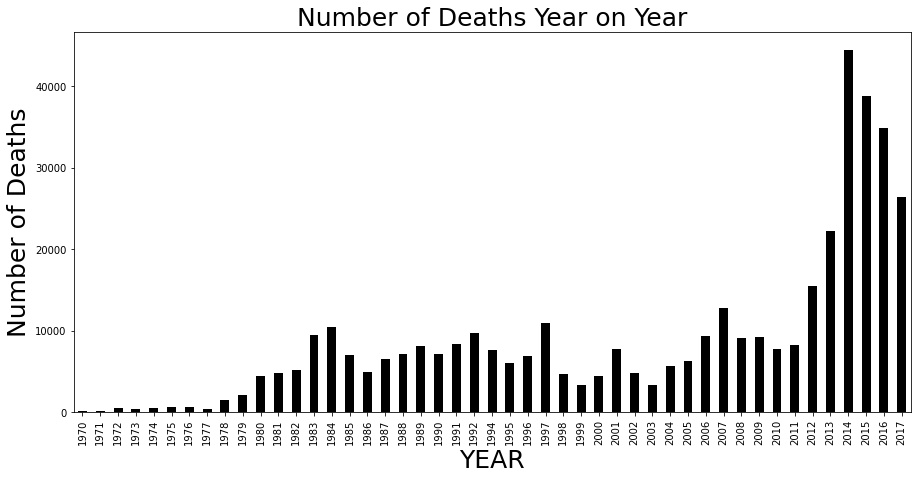

In [ ]:
# NO.of Deaths Year on Year
plt.figure(figsize = (15,7))
GT_df.groupby(['YEAR'])['KILLED'].sum().plot(kind='bar',colormap='bone')
plt.title('Number of Deaths Year on Year',fontsize=25)
plt.xlabel('YEAR',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()



*   More than 40000 deaths in 2014.
  



6- Top Most Activate Terror Organization 

---



In [ ]:
GT_df['Group'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

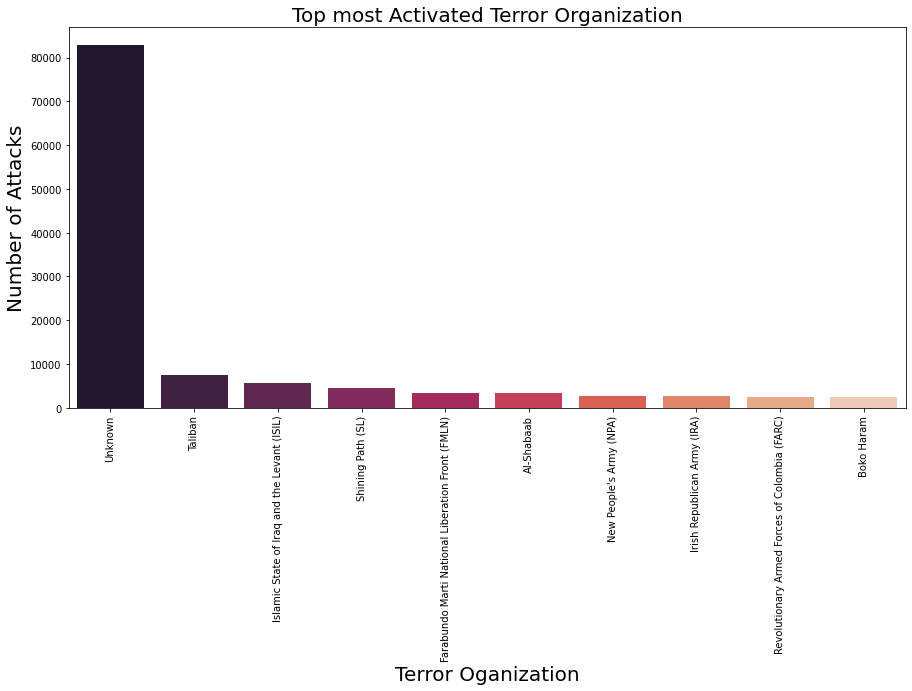

In [ ]:
#Top Most Active Terror organization
plt.figure(figsize=(15,7))
sns.barplot(GT_df['Group'].value_counts().head(10).index, GT_df['Group'].value_counts().head(10).values,palette='rocket')
plt.title('Top most Activated Terror Organization',fontsize=20)
plt.xlabel('Terror Oganization',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=90)
plt.show()



*   Taliban is the IInd most Active Terror Organization. 



7-No. of Attacks Year on Year

---



In [31]:
A_Year=GT_df['YEAR'].unique()
print(A_Year)

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


In [32]:
B_Year=GT_df['YEAR'].value_counts(dropna = False).sort_index()
print(B_Year)

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: YEAR, dtype: int64


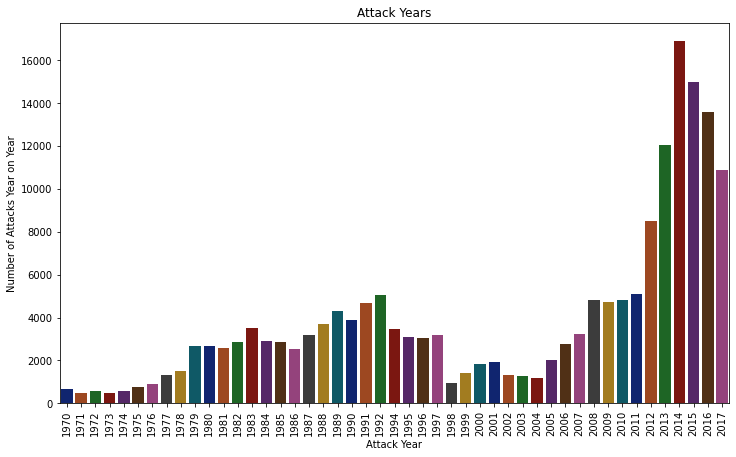

In [33]:
#No. of Attacks Year on Year
plt.figure(figsize = (12,7))
sns.barplot(x = A_Year,
           y = B_Year,
           palette = 'dark')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Year on Year')
plt.title('Attack Years')
plt.show()



*   More than 16000 Attacks in 2014.As per Data most Terrorist activities happen in this year. After 2014 the trend lookinf cool off.

**Conclusion**

---



*After performing the EDa we get the following insights from the data: *
 *   The most common attack type was Bombing/Explosion.
 *   Explosives have been consistently the most popular weapon of choice for terrorists.
 *   Private Citizens and Property were attacked most followed by Military, Police,Government and so on.

*   Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.


*   In the last decade 2014 had most number of terror attacks. That was around 16000 attacks during this year.















